In [1]:
from imports import *
from transformers import ResNetForImageClassification, ResNetConfig

In [1]:
import torch
import pyvene as pv
from datasets import load_dataset
from transformers import AutoFeatureExtractor, AutoModelForImageClassification

feature_extractor = AutoFeatureExtractor.from_pretrained("microsoft/resnet-18")
resnet = AutoModelForImageClassification.from_pretrained("microsoft/resnet-18")

dataset = load_dataset("huggingface/cats-image")
base_image = dataset["test"]["image"][0]
source_image = dataset["test"]["image"][0]
base_inputs = feature_extractor(base_image, return_tensors="pt")
source_inputs = feature_extractor(source_image, return_tensors="pt")
source_inputs['pixel_values'] += 0.5*torch.randn(source_inputs['pixel_values'].shape)

def create_mask():
    _mask = torch.zeros((56, 56))
    _mask[56//2:, 56//2:] = 1
    return _mask
m = create_mask()


pv_resnet = pv.IntervenableModel({
    "component": "resnet.embedder.pooler.output", 
    "intervention": lambda b, s: b * (1. - m) + s * m}, 
    model=resnet
)
intervened_outputs = pv_resnet(
    # base_inputs, [source_inputs], return_dict=True
        base_inputs, [source_inputs]
)
(intervened_outputs.intervened_outputs.logits - intervened_outputs.original_outputs.logits).sum()


/Users/maheepchaudhary/pytorch/env/lib/python3.11/site-packages/transformers/models/convnext/feature_extraction_convnext.py:28: FutureWarning: The class ConvNextFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ConvNextImageProcessor instead.
  warnings.warn(
/Users/maheepchaudhary/pytorch/env/lib/python3.11/site-packages/datasets/load.py:1429: FutureWarning: The repository for huggingface/cats-image contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/huggingface/cats-image
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'items'

AttributeError: 'NoneType' object has no attribute 'items'

In [2]:

resnet = ResNetForImageClassification.from_pretrained('resnet_pvr_model', num_labels=10)
config = resnet.config
resnet

ResNetForImageClassification(
  (resnet): ResNetModel(
    (embedder): ResNetEmbeddings(
      (embedder): ResNetConvLayer(
        (convolution): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (normalization): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activation): ReLU()
      )
      (pooler): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    )
    (encoder): ResNetEncoder(
      (stages): ModuleList(
        (0): ResNetStage(
          (layers): Sequential(
            (0): ResNetBottleNeckLayer(
              (shortcut): ResNetShortCut(
                (convolution): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (normalization): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              )
              (layer): Sequential(
                (0): ResNetConvLayer(
                  (convolution): Conv2d(64

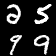

In [3]:
image = Image.open('pvr_mnist_dataset/images/combined_image_2.png').convert('RGB')
transforms.ToPILImage()(np.array(image))

In [5]:
import pyvene as pv

config = resnet.config

pv_resnet = pv.IntervenableModel({
    "component": "resnet.embedder.pooler.output", 
    "source_representation": torch.zeros(config.pooler_shape, dtype = torch.float32)}, model=resnet)


intervened_outputs = pv_resnet(
    base = torch.tensor(np.array(image), dtype = torch.float32).reshape(1,-1,56,56), 
    unit_locations={"sources->base": [0,5]}
    # unit_locations={"base": [0,1,2,3]}, 
    # subspaces=[0,1,2,3]
    )[0][-1][0]

'''
The unit locations has been defined in such a way that it corresponds to the 
language models having the dimension in the order (batch_size, sequence_length, hidden_size).
Meanwhile, the images have the dimension in the order 
(batch_size, channels, height, width), hence creating an issue.
'''

# I think intervened output gives both the output of the model, i.e. the prediction of counterfactual and also of factual model.

# print("Now finally, the model has ran and this is the intervened output" +str( intervened_outputs))

print(intervened_outputs)
predicted_indices = torch.argmax(intervened_outputs)
class_names = [str(i) for i in range(10)]  # Class names from 0 to 9
# predicted_classes = [class_names[idx] for idx in predicted_indices.cpu().numpy()]
class_names[int(predicted_indices)]

# As the top left digit is "2", the "top right" digit has been predicted. 

The shape of the embedding is:  torch.Size([1, 64, 14, 14])
The shape of the embedding is:  torch.Size([14, 14, 1, 64])


RuntimeError: shape '[1, 1, 14, 14]' is invalid for input of size 12544